# Exercise 3-2: Neural Networks

In this part of the exercise, we will implement a neural network to recognize handwritten digits using the same training set as before. We will be using parameters from a already trained neural network for this exercise.

## Initialize Parameters

Setup the parameters this part of the exercise as follows:

In [6]:
input_layer_size = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data

`ex3data1.mat` contains 5000 training samples of handwritten digits. Each sample is a 20 pixel by 20 pixel grayscale image.

In [7]:
import numpy as np
import scipy.io as sio


mat_data = sio.loadmat('ex3data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
m, n = X.shape

Randomly select 100 samples to display:

In [8]:
import matplotlib.pyplot as plt

from display_data import display_data


rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]
plt.figure()
#display_data(sel, padding=1)
plt.show()

<Figure size 432x288 with 0 Axes>

## Part 2: Loading Parameters

Load the trained neural network parameters from `ex3weights.mat`:

In [9]:
mat_param = sio.loadmat('ex3weights.mat')
Theta_1 = mat_param['Theta1']
Theta_2 = mat_param['Theta2']

## Part 3: Implement Predict

The `predict()` predicts the label of an input given a trained neural network.

In [10]:
def predict(Theta_1, Theta_2, X):
    """
    Predict the label of an input given a trained neural network.

    Parameters
    ----------
    Theta_1 : ndarray
        Trained weights of layer 1 of the neural network.
    Theta_2 : ndarray
        Trained weights of layer 2 of the neural network.
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    p : ndarray, shape (n_samples,)
         The prediction for x.
    """

    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    A_1 = sigmoid(X.dot(Theta_1.T))
    A_1 = np.hstack((np.ones((m, 1)), A_1))
    A_2 = sigmoid(A_1.dot(Theta_2.T))

    p = np.argmax(A_2, axis=1)
    p += 1  # The theta_1 and theta_2 are loaded from Matlab data, in which the matrix index starts from 1.

    return p


def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array_like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

Calculate the accuracy on training set:

In [11]:
pred = predict(Theta_1, Theta_2, X)
print('Training Set Accuracy:', np.mean(pred == y) * 100)

SyntaxError: invalid syntax (590662844.py, line 2)

Finally, we randomly select 5 samples to predict one at a time and to see what it is predicting.

Displaying Example Image
Neural Network Prediction: [4] (digit [4])


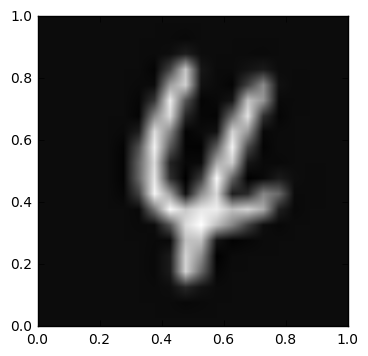

Displaying Example Image
Neural Network Prediction: [1] (digit [1])


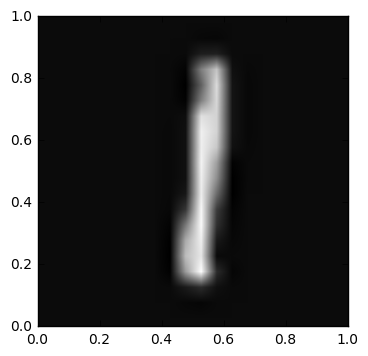

Displaying Example Image
Neural Network Prediction: [2] (digit [2])


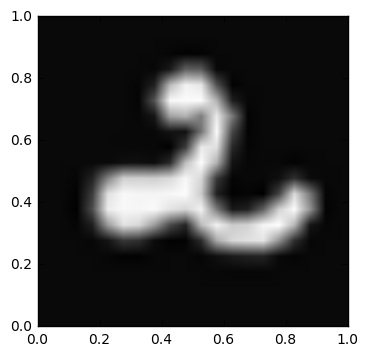

Displaying Example Image
Neural Network Prediction: [2] (digit [2])


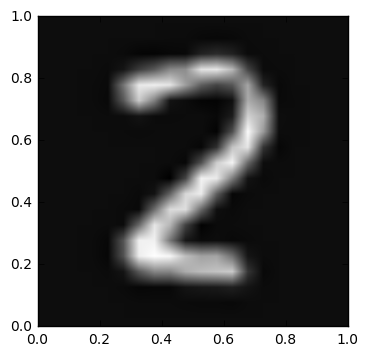

Displaying Example Image
Neural Network Prediction: [10] (digit [0])


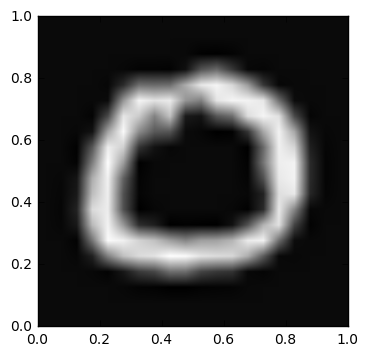

In [ ]:
rp = np.random.permutation(m)
for i in range(5):
    print('Displaying Example Image')
    display_data(X[rp[i],].reshape(1, n))
    pred = predict(Theta_1, Theta_2, X[rp[i],].reshape(1, n))
    print('Neural Network Prediction: {} (digit {})'.format(pred, pred % 10))
    plt.show()